# Linear Regression Assignment
### Jyoti Rohodia

## Problem Statement:
####  A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic and aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

#### Essentially, the company wants to identitfy —

- #### Which variables are significant in predicting the demand for shared bikes.

- #### To create a linear model that quantitatively relates bike demands with respect to variables like weather, day of the week, holiday, temperature etc.

- #### To know the accuracy of the model, i.e. How well those variables describe the bike demands.

## Importing essential modules

In [1]:
# Importing the required modules.

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error, r2_score

## STEP 1 - Data Understanding And Data Cleaning
#### In this section, we would import Bike day  CSV file and try to understand the data variables.


#### We would check the fields with high percentage missing values/Null Values and would drop them. Also, we would treat the Invalid values/Junk values.

#### Lastly, we would standardize the values by mapping them to more consistent and intuitive units.

In [2]:
# Importing the Bike day CSV file and exploring the records.

b_day= pd.read_csv("day.csv")
b_day.head(40)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.181250,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.686950,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.470250,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.606100,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.463500,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.660450,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.441950,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.112700,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.808750,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.544400,48.2917,14.958889,41,1280,1321


In [3]:
#Exploring the data distribution of the colummns.

b_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
##Exploring the statistical distribution of the colummns.

b_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### While exploring the weekday column, found many discrepanices in weekday columns for 2018 and 2019. Hence, created a new field week_day column and fetched correct values from the date field

In [5]:
# Fetching the correct week day value from the existing date_field.

import datetime

b_day["week_day"]=b_day["dteday"].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y').weekday() )

b_day["week_day"]

0      0
1      1
2      2
3      3
4      4
      ..
725    4
726    5
727    6
728    0
729    1
Name: week_day, Length: 730, dtype: int64

In [6]:
#Mapping the fields with meaningful and consistent categorical values.

b_day["season"]=b_day["season"].map({1:"Spring",2:"Summer",3:"Fall",4:"Winters"})

b_day["yr"]=b_day["yr"].map({1:"2019",0:"2018"})

b_day["mnth"]=b_day["mnth"].map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

b_day["weathersit"]=b_day["weathersit"].map({1: "Clear, Few clouds, Partly cloudy, Partly cloudy",2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"})

# Creating a new field to represent temperature variations with the target variable just for visualization purpose.

bins=[-1,10.0,20.0,35.0,40.0,50.0]
classes=["Very Cold days","Cold Days",'Cool Days',"Hot days","Very hot days"]
b_day['Day Temp'] = pd.cut(b_day['atemp'], bins, labels=classes)

In [7]:
# Checking the mapped values in the dataframe.

b_day.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,week_day,Day Temp
217,218,06-08-2018,Fall,2018,Aug,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",29.383347,33.80770,75.5000,15.292750,1521,2773,4294,0,Cool Days
41,42,11-02-2018,Spring,2018,Feb,0,5,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",7.752731,10.67545,50.6364,7.272850,149,1597,1746,6,Cold Days
47,48,17-02-2018,Spring,2018,Feb,0,4,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",17.869153,21.43290,50.5000,15.416968,259,2216,2475,5,Cool Days
559,560,14-07-2019,Fall,2019,Jul,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",28.836653,33.30210,69.9167,9.626493,2355,4614,6969,6,Cool Days
443,444,20-03-2019,Spring,2019,Mar,0,2,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",22.994153,26.92665,80.7917,8.125157,1051,5042,6093,2,Cool Days
308,309,05-11-2018,Winters,2018,Nov,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",13.393347,16.19270,51.9167,12.667154,1156,2770,3926,0,Cold Days
226,227,15-08-2018,Fall,2018,Aug,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",27.299153,30.80835,71.2083,13.999918,775,3563,4338,2,Cool Days
198,199,18-07-2018,Fall,2018,Jul,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",30.613347,35.19625,65.1250,14.458868,841,3617,4458,2,Hot days
318,319,15-11-2018,Winters,2018,Nov,0,2,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",21.730000,25.37895,68.8750,13.375411,449,3746,4195,3,Cool Days
262,263,20-09-2018,Fall,2018,Sep,0,2,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",23.028347,26.61085,88.1250,9.041918,438,3203,3641,3,Cool Days


In [8]:
# Checking if any null values exist in the dataframe.

b_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
week_day      0
Day Temp      0
dtype: int64

#### Dropping the fields which are not significant for analysis

In [9]:
# Removing the below fields as they don't contribute into the analysis directly and probably can explained by other importaant vraible.

b_day=b_day.drop(["casual","registered","dteday","instant","weekday"],axis=1)

## STEP 2 : Exploratory Data Analysis

The most important step  is : **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

In [10]:
# Identifying correlation between the "temp" and "atemp" columns:

np.corrcoef(b_day.temp, b_day.atemp)

array([[1.        , 0.99169618],
       [0.99169618, 1.        ]])

"Temp" & "Atemp" Highly correlated hence we will drop one of the them due prevent presence of multicollinearity.

In [11]:
b_day=b_day.drop(["temp"],axis=1)

### Visualizing various categorical and numerical variables w.r.t tagret variable .i.e, cnt

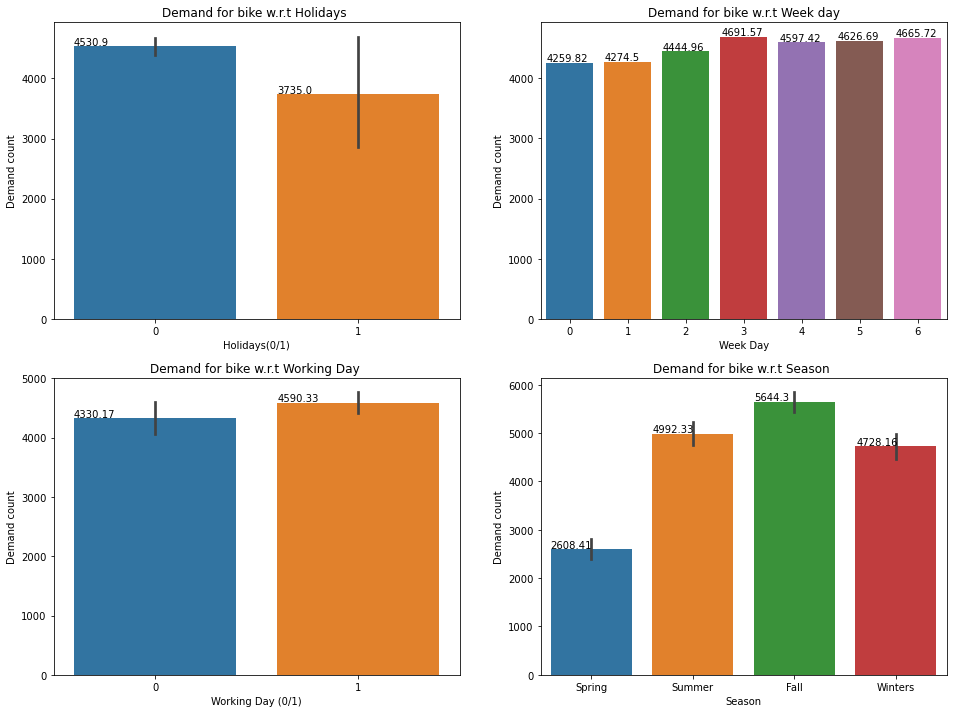

In [12]:
# Frequency distribution of Important data variables for Linear Regression Analysis

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# For Week day: 0: "Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"
ax1=sns.barplot(ax=axes[0,1],x=b_day["week_day"],y=b_day["cnt"],data=b_day, ci=None)
ax1.set_title('Demand for bike w.r.t Week day')
ax1.set(xlabel='Week Day', ylabel='Demand count') 
for g in ax1.patches:
    ax1.annotate(str(round(g.get_height(),2)), (g.get_x() * 1.005, g.get_height() * 1.005))


ax2=sns.barplot(ax=axes[0,0],x=b_day["holiday"],y=b_day["cnt"])
ax2.set_title('Demand for bike w.r.t Holidays ')
ax2.set(xlabel='Holidays(0/1)', ylabel='Demand count') 
for g in ax2.patches:
    ax2.annotate(str(round(g.get_height(),2)), (g.get_x() * 1.005, g.get_height() * 1.005))

ax3=sns.barplot(ax=axes[1,0],x=b_day["workingday"],y=b_day["cnt"])
ax3.set_title('Demand for bike w.r.t Working Day ')
ax3.set(xlabel='Working Day (0/1)', ylabel='Demand count') 
for g in ax3.patches:
    ax3.annotate(str(round(g.get_height(),2)), (g.get_x() * 1.005, g.get_height() * 1.005))
    
ax4=sns.barplot(ax=axes[1,1],x=b_day["season"],y=b_day["cnt"])
ax4.set_title('Demand for bike w.r.t Season ')
ax4.set(xlabel='Season', ylabel='Demand count') 
for g in ax4.patches:
    ax4.annotate(str(round(g.get_height(),2)), (g.get_x() * 1.005, g.get_height() * 1.005))
    
plt.show()

* Fig 1: The Bike demand is more during non holiday days.
* Fig 2: The Bike Demand is more towards the end of the Week ( Maximum during Thursday, followed by Sunday).
* Fig 3: The Bike demand is more during working day.
* Fig 4: The Bike demand is more during Fall and Summer time.

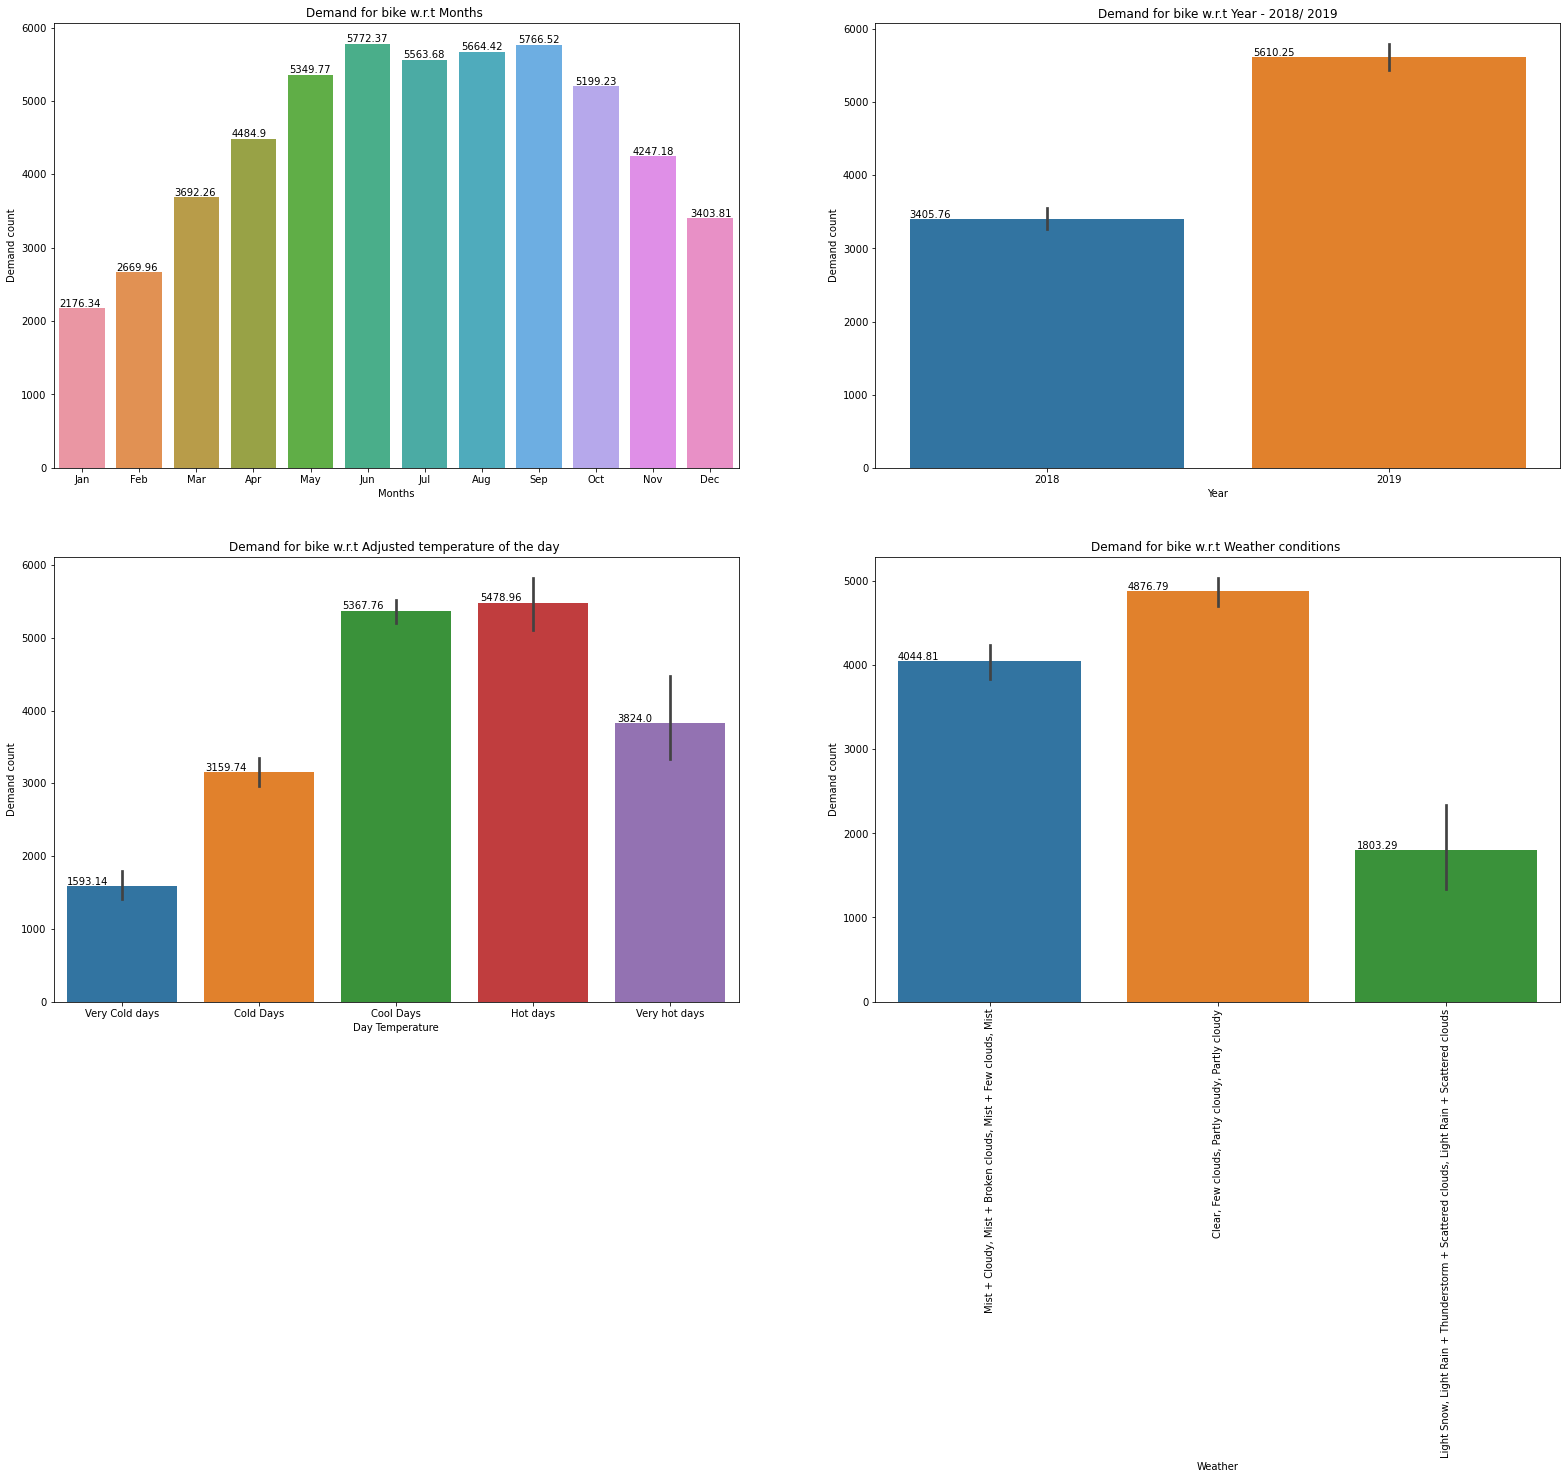

In [13]:
# Frequency distribution of Important data variables for Linear Regression Analysis

fig, axes = plt.subplots(2, 2, figsize=(27, 18))

ax1=sns.barplot(ax=axes[0,1],x=b_day["yr"],y=b_day["cnt"],data=b_day)
ax1.set_title('Demand for bike w.r.t Year - 2018/ 2019')
ax1.set(xlabel='Year', ylabel='Demand count') 
for g in ax1.patches:
    ax1.annotate(str(round(g.get_height(),2)), (g.get_x() * 1.005, g.get_height() * 1.005))


ax2=sns.barplot(ax=axes[0,0],x=b_day["mnth"],y=b_day["cnt"], ci=None)
ax2.set_title('Demand for bike w.r.t Months ')
ax2.set(xlabel='Months', ylabel='Demand count') 
for g in ax2.patches:
    ax2.annotate(str(round(g.get_height(),2)), (g.get_x() * 1.005, g.get_height() * 1.005))

ax3=sns.barplot(ax=axes[1,1],x=b_day["weathersit"],y=b_day["cnt"])
ax3.set_title('Demand for bike w.r.t Weather conditions ')
ax3.set(xlabel='Weather', ylabel='Demand count') 
plt.xticks(rotation = 90) 
for g in ax3.patches:
    ax3.annotate(str(round(g.get_height(),2)), (g.get_x() * 1.005, g.get_height() * 1.005))
    
ax4=sns.barplot(ax=axes[1,0],x=b_day["Day Temp"],y=b_day["cnt"])
ax4.set_title('Demand for bike w.r.t Adjusted temperature of the day ')
ax4.set(xlabel='Day Temperature', ylabel='Demand count') 
for g in ax4.patches:
    ax4.annotate(str(round(g.get_height(),2)), (g.get_x() * 1.005, g.get_height() * 1.005))
    
plt.show()

* Fig 1: The Bike demand is more during months of June to Septemper.
* Fig 2: The Bike Demand is more in the year 2019 compared to year 2018.
* Fig 3: The Bike demand is on days where temperature is between: 20-40 degrees.
* Fig 4: The Bike demand is more when the weather is Clear, partly cloudy.

### Creating various scatter plot and correlation graphs to explore the association between the variables.

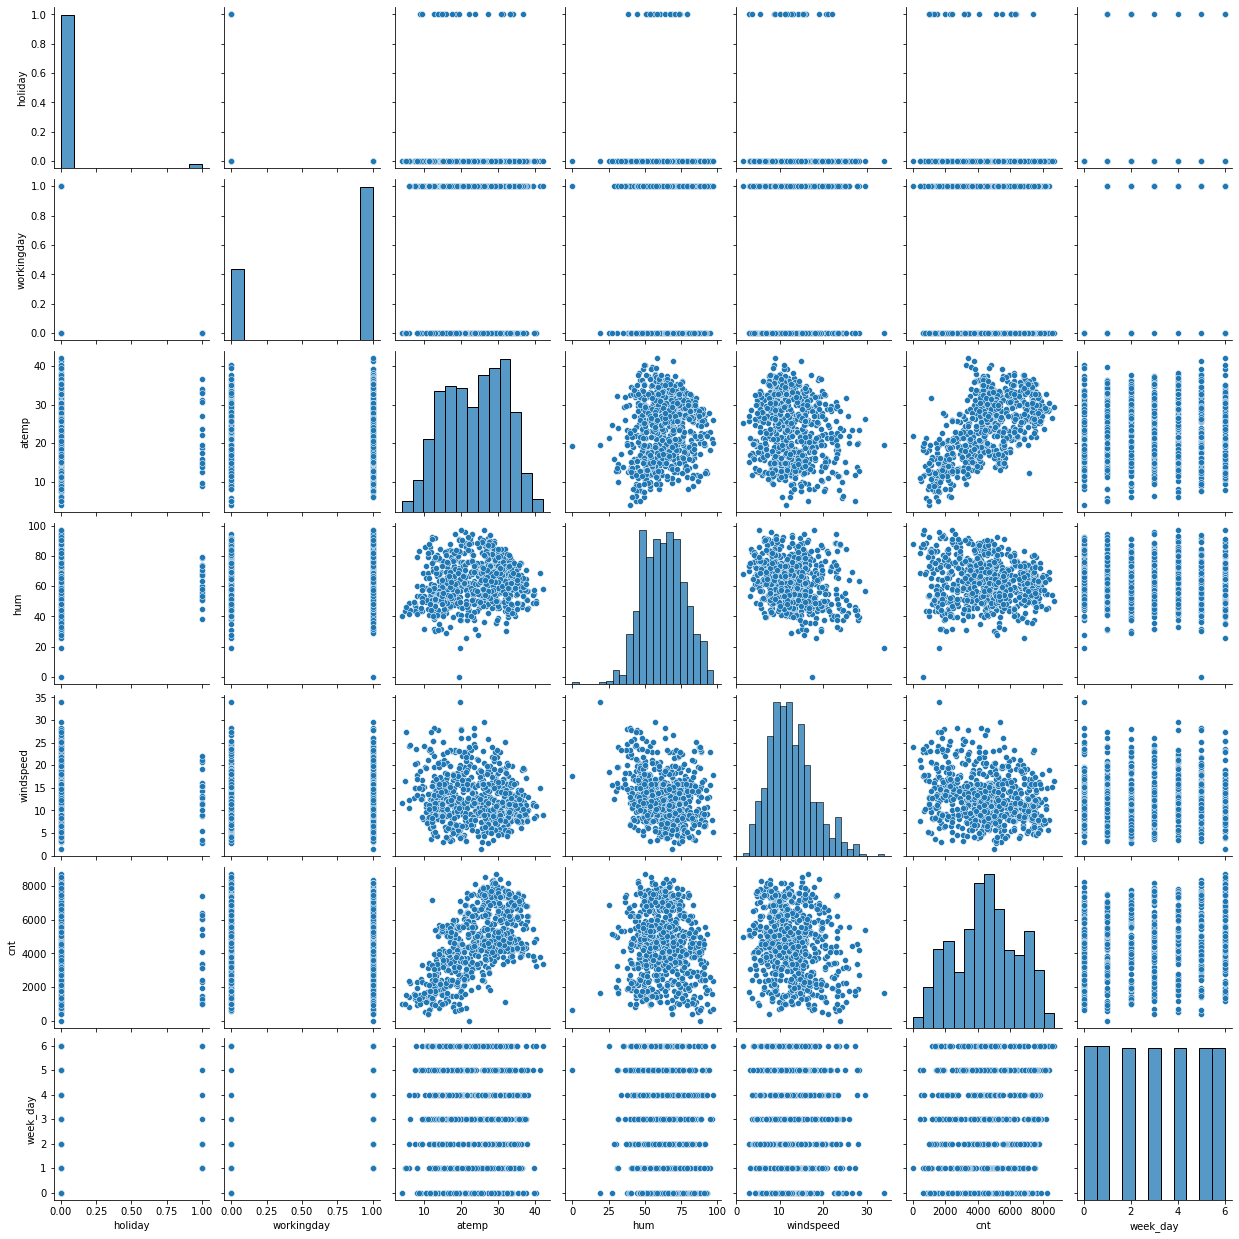

In [14]:
# Creating pairplot to display the relationship between the numerical columns

sns.pairplot(b_day)

<AxesSubplot:>

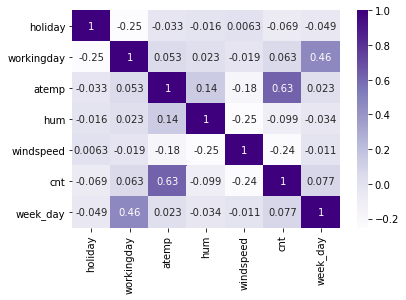

In [15]:
# Creating a Heatmap of the correlation obtained among all the numerical variables in dataframe.

sns.heatmap(b_day.corr(), annot=True, cmap="Purples")

From the above figures, we see strong correlation between variable "cnt"( target variable ) Independent variables :
* atemp (Adjusted Temperature) : Positive Correlation
* windspeed: Negative Correlation
* hum ( Humidity) : Weak positive correlation

<AxesSubplot:xlabel='workingday', ylabel='week_day'>

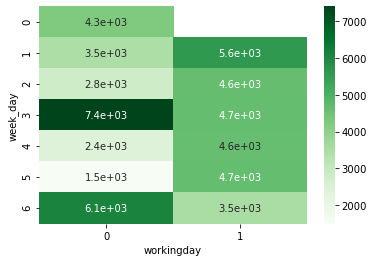

In [16]:
# Creating correlation Heatmap between weekday, working day and Bike Demand.

Wkw=pd.pivot_table(data=b_day, index="week_day", columns= "workingday", values="cnt",aggfunc="mean")
sns.heatmap(Wkw,cmap = "Greens", annot=True)

* We see that Bike demand was more consitent during Working day. However, there are some significant peaks during non-working days

<AxesSubplot:xlabel='holiday', ylabel='week_day'>

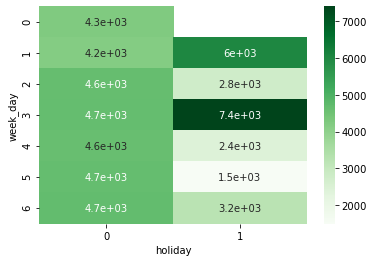

In [17]:
# Creating correlation Heatmap between weekday, holiday and Bike Demand.

Wkh=pd.pivot_table(data=b_day, index="week_day", columns= "holiday", values="cnt",aggfunc="mean")
sns.heatmap(Wkh,cmap = "Greens", annot=True)

* We see that Bike demand was more consitent during non-holiday day. However, there are some significant peaks during Holidays.

<AxesSubplot:xlabel='Day Temp', ylabel='weathersit'>

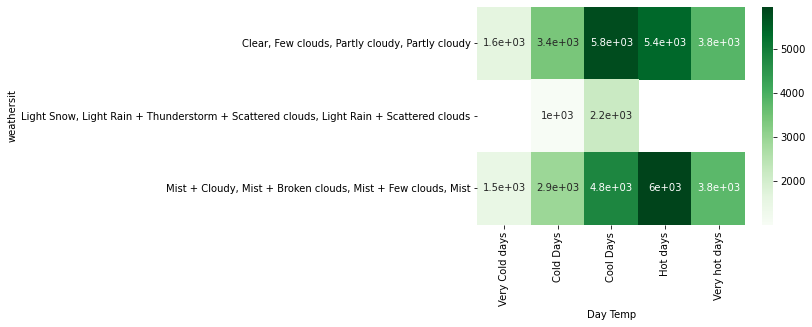

In [18]:
# Creating correlation Heatmap between Weather situation, Day temperature and Bike Demand.

Wtd=pd.pivot_table(data=b_day, index="weathersit", columns= "Day Temp", values="cnt",aggfunc="mean")
sns.heatmap(Wtd,cmap = "Greens", annot=True)

* We can see that the Bike Demand is more during Cool and Hot Days during Clear with few clouds or mist-cloudy/partly cloudy weather.

<AxesSubplot:xlabel='yr', ylabel='mnth'>

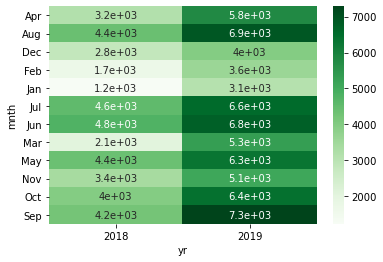

In [19]:
# Creating correlation Heatmap between Month, Year and Bike Demand.

Mny=pd.pivot_table(data=b_day, index="mnth", columns= "yr", values="cnt",aggfunc="mean")
sns.heatmap(Mny,cmap = "Greens", annot=True)

* We clearly see that the demand was high in2019, however we dont know much information to explain the reason behind it.

In [20]:
# No longer need "Day Temperature" Column , hence  we will drop the column

b_day=b_day.drop(["Day Temp"],axis=1)

## STEP 3 : Data Preparation

In [21]:
b_day.head()

,season,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,week_day
0,Spring,2018,Jan,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",18.18125,80.5833,10.749882,985,0
1,Spring,2018,Jan,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",17.68695,69.6087,16.652113,801,1
2,Spring,2018,Jan,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.47025,43.7273,16.636703,1349,2
3,Spring,2018,Jan,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",10.60610,59.0435,10.739832,1562,3
4,Spring,2018,Jan,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",11.46350,43.6957,12.522300,1600,4


### Dummy Variable Creation:
#### The categorical variables need to be converted to numeric form to be used in regression modelling and mapped to either 0 or 1 levels where 0 represents ‘absence’ and 1 means ‘presence.’. The process is also called OntHot Encoding.

#### To avoid high multicollinearity, we use “drop_first= True” option an work with m -1 levels (m – being the no. of unique values/categories.)

In [22]:
# Exploring the unique categories present in the column.

b_day["season"].value_counts()

Fall       188
Summer     184
Spring     180
Winters    178
Name: season, dtype: int64

In [23]:
# Creating Dummy variables for m-1 categories.

season_2 = pd.get_dummies(b_day["season"], drop_first=True)
season_2.sample(10)

,Spring,Summer,Winters
353,0,0,1
636,0,0,1
626,0,0,0
720,1,0,0
210,0,0,0
642,0,0,1
613,0,0,0
422,1,0,0
173,0,0,0
486,0,1,0


In [24]:
# Exploring the unique categories present in the column.

b_day["mnth"].value_counts().sort_values()
b_day["mnth"].sample(10)

230    Aug
45     Feb
319    Nov
14     Jan
668    Oct
723    Dec
437    Mar
315    Nov
362    Dec
675    Nov
Name: mnth, dtype: object

In [25]:
# Creating Dummy variables for m-1 categories.

mnth_2 = pd.get_dummies(b_day["mnth"], drop_first=True)
mnth_2.sample(10)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
586,1,0,0,0,0,0,0,0,0,0,0
639,0,0,0,0,0,0,0,0,0,1,0
657,0,0,0,0,0,0,0,0,0,1,0
620,0,0,0,0,0,0,0,0,0,0,1
247,0,0,0,0,0,0,0,0,0,0,1
442,0,0,0,0,0,0,1,0,0,0,0
546,0,0,0,0,1,0,0,0,0,0,0
242,1,0,0,0,0,0,0,0,0,0,0
162,0,0,0,0,0,1,0,0,0,0,0
426,0,0,0,0,0,0,1,0,0,0,0


In [26]:
# Exploring the unique categories present in the column.

b_day["week_day"].value_counts().sort_values()

6    104
5    104
4    104
3    104
2    104
1    105
0    105
Name: week_day, dtype: int64

In [27]:
# Creating Dummy variables for m-1 categories.

weekday_2=pd.get_dummies(b_day["week_day"], drop_first=True)
weekday_2.sample(10)

,1,2,3,4,5,6
518,0,0,0,0,0,0
105,0,0,0,0,0,0
598,0,0,1,0,0,0
472,0,0,1,0,0,0
228,0,0,0,1,0,0
305,0,0,0,1,0,0
90,0,0,0,0,0,1
243,0,0,0,0,1,0
50,1,0,0,0,0,0
25,0,0,0,1,0,0


In [28]:
# Exploring the unique categories present in the column.

b_day["weathersit"].value_counts()

Clear, Few clouds, Partly cloudy, Partly cloudy                                            463
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               246
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     21
Name: weathersit, dtype: int64

In [29]:
# Creating Dummy variables for m-1 categories.

weathersit_2=pd.get_dummies(b_day["weathersit"], drop_first=True)
weathersit_2.sample(10)

,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
319,1,0
359,0,0
52,0,0
79,0,1
163,0,0
125,0,0
389,0,0
480,0,1
166,0,1
127,0,0


In [30]:
# Exploring the unique categories present in the column.

b_day["yr"].value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [31]:
# Creating Dummy variables for m-1 categories.

yr_2=pd.get_dummies(b_day["yr"], drop_first=True)
yr_2.sample(10)

,2019
719,1
268,0
166,0
436,1
407,1
72,0
480,1
406,1
294,0
177,0


In [32]:
# concatinating the newly created levels with the existing the datarame.

b_day=pd.concat([b_day, yr_2, weathersit_2,weekday_2,mnth_2,season_2],axis=1)

In [33]:
# Checking the dimensions of the newly updated dataframe. 

b_day.shape

(730, 34)

In [34]:
# Checking the records of the newly updated dataframe.

pd.options.display.max_columns = None
b_day.sample(20)

,season,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,week_day,2019,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",1,2,3,4,5,6,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Spring,Summer,Winters
478,Summer,2019,Apr,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",20.26415,45.4167,16.708661,5633,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
357,Spring,2018,Dec,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",14.96210,54.2500,12.750368,1011,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
211,Fall,2018,Jul,0,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",36.48980,48.0833,11.042471,4302,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
13,Spring,2018,Jan,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.42065,53.7826,8.478716,1421,6,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
286,Winters,2018,Oct,0,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",26.48375,71.6250,15.000161,3644,6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
51,Spring,2018,Feb,1,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.20375,60.5000,20.625682,1107,2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
319,Winters,2018,Nov,0,1,"Light Snow, Light Rain + Thunderstorm + Scatte...",22.59940,93.0000,9.167543,1817,4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
718,Winters,2019,Dec,0,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",16.76085,66.7917,8.875021,4128,4,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
179,Fall,2018,Jun,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",32.73440,49.7917,17.542007,5225,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
590,Fall,2019,Aug,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",33.83895,68.6667,11.333586,6784,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
#Dropping the Categorical variables which are no longer required.

b_day=b_day.drop(["yr","weathersit","mnth","season","week_day"],axis=1)

In [36]:
# Checking the records of the newwly updated datatframe with only numerical columns.

b_day.sample(10)

,holiday,workingday,atemp,hum,windspeed,cnt,2019,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",1,2,3,4,5,6,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Spring,Summer,Winters
706,0,0,19.47540,91.1250,6.792393,5582,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
570,0,1,32.70270,45.0000,11.041600,8173,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
62,0,1,12.78395,61.0417,13.624182,1944,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
646,0,1,21.90560,76.1667,12.750100,6392,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
645,1,0,19.38040,70.9583,12.708493,5478,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
239,0,0,32.39795,56.1765,20.412153,4334,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
389,0,1,14.74105,64.3750,10.791757,4270,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
262,0,1,26.61085,88.1250,9.041918,3641,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
180,0,1,31.85040,43.4167,12.415904,5515,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
520,0,1,26.29460,61.3333,14.041525,7001,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [37]:
# Checking the dimensions of the newly updated dataframe.

b_day.shape

(730, 29)

## Step 4: Splitting the Data into Training and Testing Sets

#### As you know, the first basic step for regression is performing a train-test split.

In [38]:
# Creationg of Training and Test data sets for creating Linear Regression model.

df_train,df_test=train_test_split(b_day, train_size=0.7, test_size=0.3, random_state=100)


### Need to Scale the Training Dataset:
#### Scaling helps to normalize or standardize the data values within a meaningful range.
It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients

The two main reasons for scaling the features are:
* Ease of interpretation
* Faster convergence for gradient descent methods


In [39]:
# Initiating an object of Scaling method: 

scaler=MinMaxScaler()

In [40]:
# Selecting the numerical columns for performing normalization upon in order to have meaningful coefficients.

vars=["atemp","hum","windspeed","cnt"]
df_train[vars]=scaler.fit_transform(df_train[vars])

df_train.head()

,holiday,workingday,atemp,hum,windspeed,cnt,2019,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",1,2,3,4,5,6,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Spring,Summer,Winters
653,0,1,0.501133,0.575354,0.300794,0.864243,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
576,0,1,0.766351,0.725633,0.264686,0.827658,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
426,0,0,0.438975,0.640189,0.255342,0.465255,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
728,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
482,0,0,0.391735,0.504508,0.188475,0.482973,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Checking MultiCollinearity:

#### Creating correlation charts to check if any level of multicollinearity exists among the newly created variables.

<AxesSubplot:>

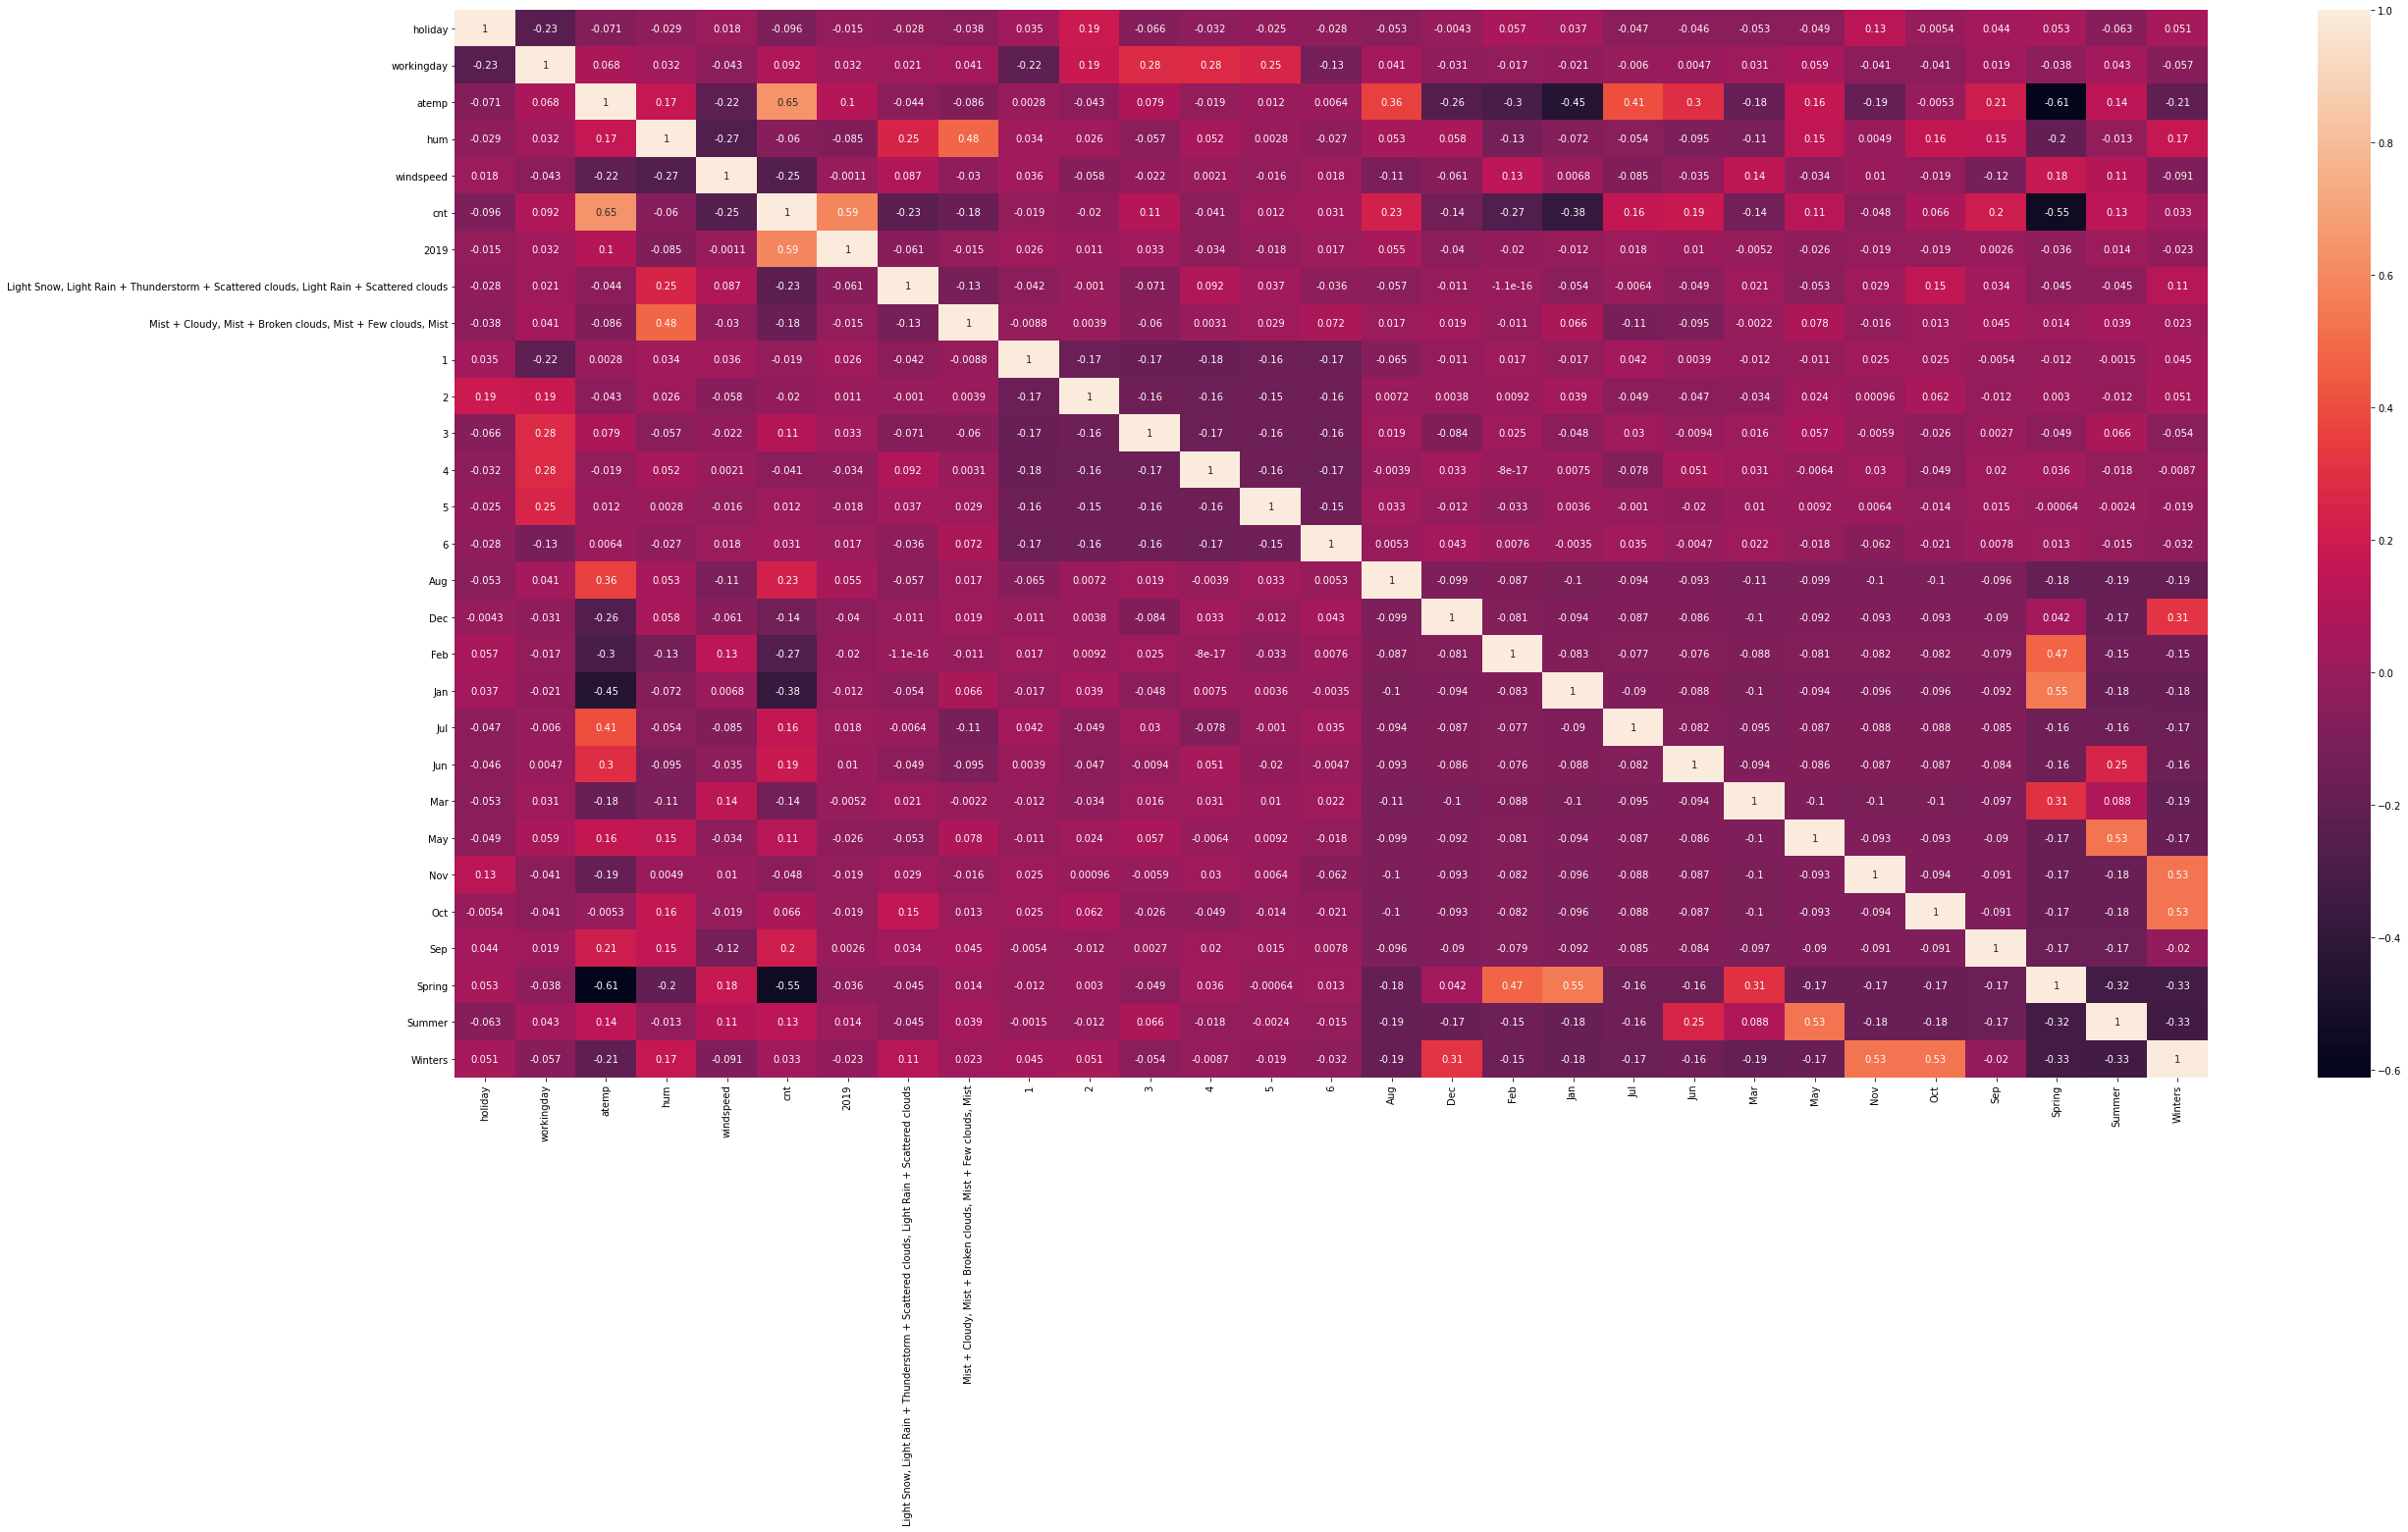

In [41]:
# Plotting a correlation Heatmap to understand that relationship between newly formed variables.
plt.figure(figsize=(40,20))

sns.heatmap(df_train.corr(),annot=True)

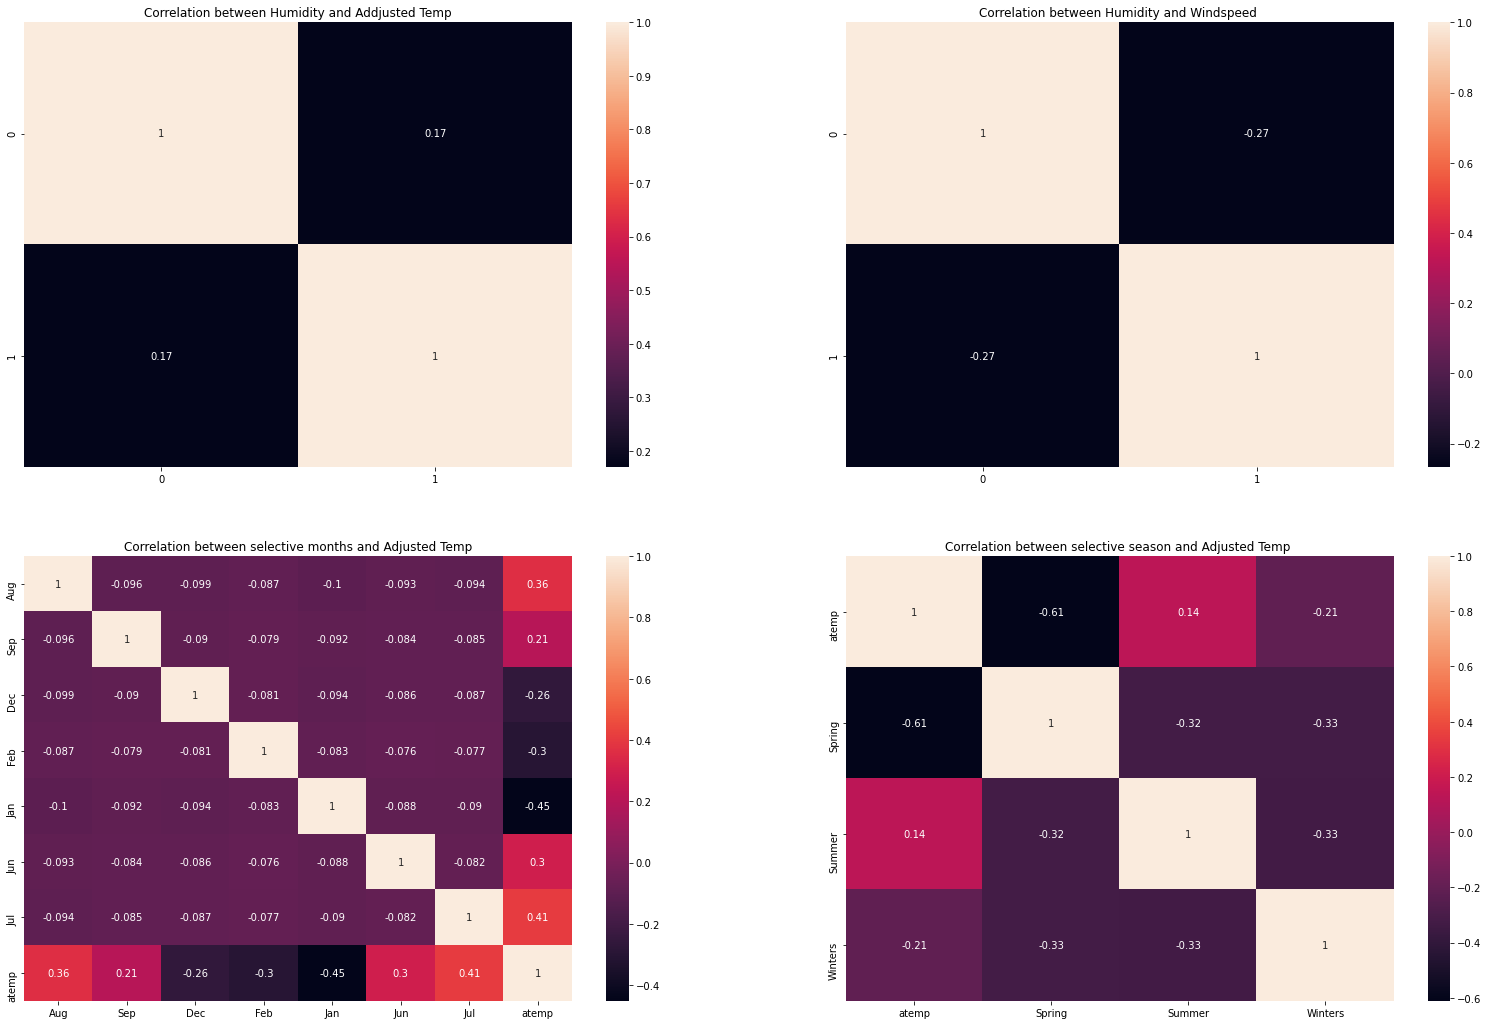

In [42]:
# Correlation Heatmaps to explore the relationship among the various independent variables

fig, axes = plt.subplots(2, 2, figsize=(27, 18))

ax1=sns.heatmap(np.corrcoef(df_train.hum, df_train.atemp), annot=True,ax=axes[0,0] )
ax1.set_title('Correlation between Humidity and Addjusted Temp')

ax2=sns.heatmap(np.corrcoef(df_train.hum, df_train.windspeed), annot=True, ax=axes[0,1])
ax2.set_title('Correlation between Humidity and Windspeed ')


ax3=sns.heatmap(df_train[["Aug", "Sep","Dec","Feb","Jan","Jun","Jul","atemp"]].corr(), annot=True,ax=axes[1,0] )
ax3.set_title('Correlation between selective months and Adjusted Temp')

    
ax4=sns.heatmap(df_train[["atemp","Spring","Summer","Winters"]].corr(), annot=True, ax=axes[1,1])
ax4.set_title('Correlation between selective season and Adjusted Temp ')

    
plt.show()

From the above Figures, we could say, 
* variable "atemp" is highly correlated with months - Aug, Jan,Jun, Jul, Feb and seasons - Spring and Winters
* variable "hum" has a stronge negative correlation with windspeed and weak positive correlation adjusted temperature.

### Creating X and Y datasets for Training the Linear Regression Model

In [43]:
# Dividing the data in to Y - containing target variable and Y - containg independent/explanatory variables

y_train=df_train.pop('cnt')
x_train=df_train


## Step 5: Building Linear Model

In [44]:
# Creating an object of Linear Regression model and fiting the x & y train data.

lm_model=LinearRegression()
lm_model.fit(x_train,y_train)

LinearRegression()

#### Model Selection using RFE : Recursive feature elimination


In [45]:
# Running RFE with the output number of the variable equal to 15

rfe=RFE(lm_model,15)
rfe=rfe.fit(x_train,y_train)

In [46]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 13),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('2019', True, 1),
 ('Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', True, 1),
 (1, False, 14),
 (2, False, 10),
 (3, False, 7),
 (4, False, 8),
 (5, False, 6),
 (6, False, 5),
 ('Aug', False, 3),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 12),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 4),
 ('Winters', True, 1)]

In [47]:
col=x_train.columns[rfe.support_]

In [48]:
col

Index(['holiday', 'atemp', 'hum', 'windspeed', '2019',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 'Dec',
       'Feb', 'Jan', 'Jul', 'Nov', 'Sep', 'Spring', 'Winters'],
      dtype='object')

#### Building LR model using Statsmodel library and explore the statistical parameters in order to evaluate the model.

In [49]:
# Creating X_test dataframe with RFE selected variables

x_train_rfe=x_train[col]

In [50]:
# Adding a constant variable 

x_train_rfe1=sm.add_constant(x_train_rfe)

# Running the Linear model.
lm_model2=sm.OLS(y_train,x_train_rfe1).fit()

In [51]:
#Checking the statistical summary of the linear model created.

lm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.0
Date:                Wed, 10 Mar 2021   Prob (F-statistic):          4.73e-187
Time:                        11:27:41   Log-Likelihood:                 509.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     494   BIC:                            -919.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3802      0.032     11.786      0.000       0.317       0.444
holiday                                                                                    -0.0842      0.026     -3.255      0.001      -0.135      -0.033
atemp                                                                                       0.4311      0.036     12.084      0.000       0.361       0.501
hum                                                                                        -0.1494      0.038     -3.930      0.000      -0.224      -0.075
windspeed                                                                                  -0.1704      0.026     -6.552      0.000      -0.222      -0.119
2019                                                                                        0.2325      0.008     28.527      0.000       0.216       0.248
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2504      0.027     -9.395      0.000      -0.303      -0.198
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0578      0.011     -5.473      0.000      -0.079      -0.037
Dec                                                                                        -0.0579      0.018     -3.202      0.001      -0.093      -0.022
Feb                                                                                        -0.0440      0.022     -2.023      0.044      -0.087      -0.001
Jan                                                                                        -0.0738      0.021     -3.453      0.001      -0.116      -0.032
Jul                                                                                        -0.0648      0.017     -3.750      0.000      -0.099      -0.031
Nov                                                                                        -0.0556      0.019     -2.958      0.003      -0.093      -0.019
Sep                                                                                         0.0588      0.016      3.773      0.000       0.028       0.089
Spring                                                                                     -0.0909      0.017     -5.263      0.000      -0.125      -0.057
Winters                                                                                     0.0676      0.014      4.812      0.000       0.040       0.095
==============================================================================
Omnibus:                       73.780   

#### Calculating Variance Inflation Factor (VIF):  to assess multicollinearity in the dataset.
It basically helps explaining the relationship of one independent variable with all the other independent variables. 


In [52]:
x_train_rfe1= x_train_rfe1.drop(['const'], axis=1)

In [53]:
# Calculating VIF Value

vif=pd.DataFrame()
X=x_train_rfe1
vif["Features"]=x_train_rfe1.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,hum,25.58
1,atemp,17.32
13,Spring,4.08
3,windspeed,4.00
14,Winters,2.94
9,Jan,2.38
6,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.27
4,2019,2.07
8,Feb,1.92
11,Nov,1.84


Based on the above values, we see __hum__ variable and __atemp__ are highly correlated and hence resulting in very high VIF value.

We will drop __hum__ variable and re-run the model.

In [54]:
x_train_new=x_train_rfe1.drop(["hum"], axis=1)

In [55]:
# Adding a constant to the new set of X-train.

x_train_new_lm=sm.add_constant(x_train_new)

In [56]:
# Running the Linear Model agai.

lm_model3=sm.OLS(y_train,x_train_new_lm).fit()

In [57]:
#Checking the statistical summary of the linear model created.

lm_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.1
Date:                Wed, 10 Mar 2021   Prob (F-statistic):          6.65e-185
Time:                        11:27:41   Log-Likelihood:                 501.73
No. Observations:                 510   AIC:                            -973.5
Df Residuals:                     495   BIC:                            -909.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3041      0.026     11.617      0.000       0.253       0.356
holiday                                                                                    -0.0851      0.026     -3.243      0.001      -0.137      -0.034
atemp                                                                                       0.3956      0.035     11.298      0.000       0.327       0.464
windspeed                                                                                  -0.1450      0.026     -5.672      0.000      -0.195      -0.095
2019                                                                                        0.2360      0.008     28.733      0.000       0.220       0.252
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2921      0.025    -11.784      0.000      -0.341      -0.243
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0817      0.009     -9.322      0.000      -0.099      -0.064
Dec                                                                                        -0.0639      0.018     -3.496      0.001      -0.100      -0.028
Feb                                                                                        -0.0458      0.022     -2.076      0.038      -0.089      -0.002
Jan                                                                                        -0.0800      0.022     -3.698      0.000      -0.123      -0.037
Jul                                                                                        -0.0570      0.017     -3.272      0.001      -0.091      -0.023
Nov                                                                                        -0.0553      0.019     -2.901      0.004      -0.093      -0.018
Sep                                                                                         0.0556      0.016      3.521      0.000       0.025       0.087
Spring                                                                                     -0.0928      0.018     -5.303      0.000      -0.127      -0.058
Winters                                                                                     0.0591      0.014      4.199      0.000       0.031       0.087
==============================================================================
Omnibus:                       76.970   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.005
Skew:                          -0.743 

In [58]:
# Calculating VIF Value

vif=pd.DataFrame()
X=x_train_new
vif["Features"]=x_train_new.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,atemp,4.61
2,windspeed,3.96
12,Spring,3.75
13,Winters,2.59
8,Jan,2.20
3,2019,2.06
7,Feb,1.88
10,Nov,1.81
6,Dec,1.55
5,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.54


#### It seems that we were able to get rid of the high multicollineraity in the model and now all other parameters seem to under the acceptable range.

#### Looking at the Summary Statistics of the new model, all of the parameters seem to significant. However we would like to check the contribution made by each variable and try to remove the least contributing variables.

In [59]:
# Droping the 'Feb' column p-value = 0.038 and low value for Beta coefficeint.

x_train_new_2=x_train_new.drop(["Feb"], axis=1)

# Adding a constant to the new set of X-train.

x_train_new_lm2=sm.add_constant(x_train_new_2)

In [60]:
# Fitting and Running the model

lm_model5=sm.OLS(y_train,x_train_new_lm2).fit()
lm_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 10 Mar 2021   Prob (F-statistic):          3.95e-185
Time:                        11:27:41   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2931      0.026     11.396      0.000       0.243       0.344
holiday                                                                                    -0.0881      0.026     -3.349      0.001      -0.140      -0.036
atemp                                                                                       0.4117      0.034     12.022      0.000       0.344       0.479
windspeed                                                                                  -0.1418      0.026     -5.540      0.000      -0.192      -0.092
2019                                                                                        0.2357      0.008     28.604      0.000       0.220       0.252
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2912      0.025    -11.708      0.000      -0.340      -0.242
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0817      0.009     -9.296      0.000      -0.099      -0.064
Dec                                                                                        -0.0531      0.018     -3.020      0.003      -0.088      -0.019
Jan                                                                                        -0.0562      0.018     -3.053      0.002      -0.092      -0.020
Jul                                                                                        -0.0598      0.017     -3.432      0.001      -0.094      -0.026
Nov                                                                                        -0.0501      0.019     -2.640      0.009      -0.087      -0.013
Sep                                                                                         0.0557      0.016      3.514      0.000       0.025       0.087
Spring                                                                                     -0.1096      0.016     -7.036      0.000      -0.140      -0.079
Winters                                                                                     0.0580      0.014      4.110      0.000       0.030       0.086
==============================================================================
Omnibus:                       71.564   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.324
Skew:                          -0.692   Prob(JB):                     1.05e-42
Kurtosis:                       5.680   Cond. No.                         15.5
====================================

In [61]:
# We remove "Nov" coulmn due to low Beta value.

x_train_new_3=x_train_new_2.drop(["Nov"], axis=1)

# Adding a constant to the new set of X-train.

x_train_new_lm3=sm.add_constant(x_train_new_3)

# Fitting and running the model
lm_model6=sm.OLS(y_train,x_train_new_lm3).fit()
lm_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.6
Date:                Wed, 10 Mar 2021   Prob (F-statistic):          8.41e-185
Time:                        11:27:41   Log-Likelihood:                 495.96
No. Observations:                 510   AIC:                            -965.9
Df Residuals:                     497   BIC:                            -910.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2803      0.025     11.031      0.000       0.230       0.330
holiday                                                                                    -0.0963      0.026     -3.664      0.000      -0.148      -0.045
atemp                                                                                       0.4304      0.034     12.766      0.000       0.364       0.497
windspeed                                                                                  -0.1414      0.026     -5.490      0.000      -0.192      -0.091
2019                                                                                        0.2357      0.008     28.432      0.000       0.219       0.252
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2864      0.025    -11.478      0.000      -0.335      -0.237
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0808      0.009     -9.140      0.000      -0.098      -0.063
Dec                                                                                        -0.0357      0.016     -2.177      0.030      -0.068      -0.003
Jan                                                                                        -0.0510      0.018     -2.768      0.006      -0.087      -0.015
Jul                                                                                        -0.0625      0.017     -3.572      0.000      -0.097      -0.028
Sep                                                                                         0.0597      0.016      3.763      0.000       0.029       0.091
Spring                                                                                     -0.1060      0.016     -6.792      0.000      -0.137      -0.075
Winters                                                                                     0.0406      0.013      3.234      0.001       0.016       0.065
==============================================================================
Omnibus:                       63.315   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.929
Skew:                          -0.636   Prob(JB):                     3.08e-35
Kurtosis:                       5.421   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# We remove "Dec" coulmn due low Beta value and p-value=0.03

x_train_new_4=x_train_new_3.drop(["Dec"], axis=1)

# Adding a constant to the new set of X-train.

x_train_new_lm4=sm.add_constant(x_train_new_4)

# Fitting and running the model
lm_model7=sm.OLS(y_train,x_train_new_lm4).fit()
lm_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Wed, 10 Mar 2021   Prob (F-statistic):          5.75e-185
Time:                        11:27:41   Log-Likelihood:                 493.54
No. Observations:                 510   AIC:                            -963.1
Df Residuals:                     498   BIC:                            -912.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2685      0.025     10.775      0.000       0.220       0.318
holiday                                                                                    -0.0944      0.026     -3.582      0.000      -0.146      -0.043
atemp                                                                                       0.4450      0.033     13.419      0.000       0.380       0.510
windspeed                                                                                  -0.1347      0.026     -5.249      0.000      -0.185      -0.084
2019                                                                                        0.2358      0.008     28.342      0.000       0.219       0.252
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2834      0.025    -11.332      0.000      -0.333      -0.234
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0807      0.009     -9.100      0.000      -0.098      -0.063
Jan                                                                                        -0.0427      0.018     -2.361      0.019      -0.078      -0.007
Jul                                                                                        -0.0646      0.018     -3.686      0.000      -0.099      -0.030
Sep                                                                                         0.0610      0.016      3.830      0.000       0.030       0.092
Spring                                                                                     -0.1079      0.016     -6.899      0.000      -0.139      -0.077
Winters                                                                                     0.0351      0.012      2.844      0.005       0.011       0.059
==============================================================================
Omnibus:                       59.159   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.706
Skew:                          -0.604   Prob(JB):                     3.78e-32
Kurtosis:                       5.313   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# We remove "Jan" coulmn due low Beta value and p-value=0.019

x_train_new_5=x_train_new_4.drop(["Jan"], axis=1)

# Adding a constant to the new set of X-train.

x_train_new_lm5=sm.add_constant(x_train_new_5)

# Fitting and running the model

lm_model8=sm.OLS(y_train,x_train_new_lm5).fit()
lm_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.0
Date:                Wed, 10 Mar 2021   Prob (F-statistic):          5.68e-185
Time:                        11:27:41   Log-Likelihood:                 490.70
No. Observations:                 510   AIC:                            -959.4
Df Residuals:                     499   BIC:                            -912.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.2544      0.024     10.468      0.000       0.207       0.302
holiday                                                                                    -0.0951      0.026     -3.591      0.000      -0.147      -0.043
atemp                                                                                       0.4642      0.032     14.375      0.000       0.401       0.528
windspeed                                                                                  -0.1256      0.025     -4.928      0.000      -0.176      -0.076
2019                                                                                        0.2351      0.008     28.145      0.000       0.219       0.252
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2819      0.025    -11.225      0.000      -0.331      -0.233
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0817      0.009     -9.176      0.000      -0.099      -0.064
Jul                                                                                        -0.0680      0.018     -3.875      0.000      -0.102      -0.034
Sep                                                                                         0.0601      0.016      3.757      0.000       0.029       0.091
Spring                                                                                     -0.1174      0.015     -7.730      0.000      -0.147      -0.088
Winters                                                                                     0.0390      0.012      3.170      0.002       0.015       0.063
==============================================================================
Omnibus:                       58.762   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.570
Skew:                          -0.593   Prob(JB):                     1.49e-32
Kurtosis:                       5.343   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### As we are removing least contributing columns, our F-Statistics is increasing which means that our Model is becoming more and more significant.

In [64]:
# We remove "winters" coulmn due to low Beta value

x_train_new_6=x_train_new_5.drop(["Winters"], axis=1)

# Adding a constant to the new set of X-train.

x_train_new_lm6=sm.add_constant(x_train_new_6)

# Fitting and running the model

lm_model9=sm.OLS(y_train,x_train_new_lm6).fit()
lm_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.2
Date:                Wed, 10 Mar 2021   Prob (F-statistic):          4.83e-184
Time:                        11:27:41   Log-Likelihood:                 485.62
No. Observations:                 510   AIC:                            -951.2
Df Residuals:                     500   BIC:                            -908.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                       0.3008      0.020     15.373      0.000       0.262       0.339
holiday                                                                                    -0.0902      0.027     -3.381      0.001      -0.143      -0.038
atemp                                                                                       0.4125      0.028     14.668      0.000       0.357       0.468
windspeed                                                                                  -0.1370      0.025     -5.382      0.000      -0.187      -0.087
2019                                                                                        0.2359      0.008     28.004      0.000       0.219       0.252
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2754      0.025    -10.905      0.000      -0.325      -0.226
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0824      0.009     -9.169      0.000      -0.100      -0.065
Jul                                                                                        -0.0698      0.018     -3.944      0.000      -0.105      -0.035
Sep                                                                                         0.0585      0.016      3.630      0.000       0.027       0.090
Spring                                                                                     -0.1453      0.012    -11.635      0.000      -0.170      -0.121
==============================================================================
Omnibus:                       49.697   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.290
Skew:                          -0.533   Prob(JB):                     4.14e-25
Kurtosis:                       5.036   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
## Calculating VIF Value

vif=pd.DataFrame()
X=x_train_new_6
vif["Features"]=x_train_new_6.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,atemp,4.50
2,windspeed,3.75
3,2019,2.03
8,Spring,1.51
5,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.49
6,Jul,1.32
7,Sep,1.20
4,"Light Snow, Light Rain + Thunderstorm + Scatte...",1.06
0,holiday,1.03


Although 2019 shows that Bike Demand was higher than 2018, however, it would not be useful in predicting future demands as we do not know the reason behind this increase.

### P-value and VIF seem decent to finalize the model.

### Evaluate the model based on the below statistical paramters:

#### The below statistics would help us to identify goodness of fit for a Linear Regression model and how accurately our model predicts:

* __T-Statistics__: If the probability of the T .i.e P(t) < 0.05, then we can say variable is significant ( Rejecting NULL Hypothesis): __Got 9 significant variables__

* __F-Statistics__: Overall model fit is significant or not. Higher the F Statistics , lower would be P(F-statistics) and the model would be more significant: Based on this parameter: __Our Model seems significant__

* __R-squared__: It tells the extent of the fit -how well the straight line describes the variance in the data. Its value ranges from 0 to 1 : In the our model, the __R-Sqaured is as high as 82.7% which is good as much of the variance is explianed by the model__

* __Adjusted R-Squared__: It is as high as __82.4%__ which is a good number too in MLR.


## Step 6: Residual Analysis of the Train data

#### The normal distribution of the residual terms is a very crucial assumption when it comes to making inferences from a linear regression model. Hence, it is very important that you analyse these residual terms before you can move forward. 

The simplest method to check for the normality is to plot a histogram of the error terms and check whether the error terms are normal.

In [66]:
# Making the Predicton using the model

y_train_pred = lm_model9.predict(x_train_new_lm6)

Text(0, 0.5, 'Y Train Pred')

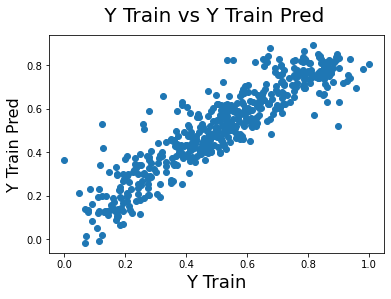

In [67]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle(' Y Train vs Y Train Pred', fontsize = 20)              # Plot heading 
plt.xlabel('Y Train', fontsize = 18)                         # X-label
plt.ylabel('Y Train Pred', fontsize = 16) 

Text(0, 0.5, 'Views')

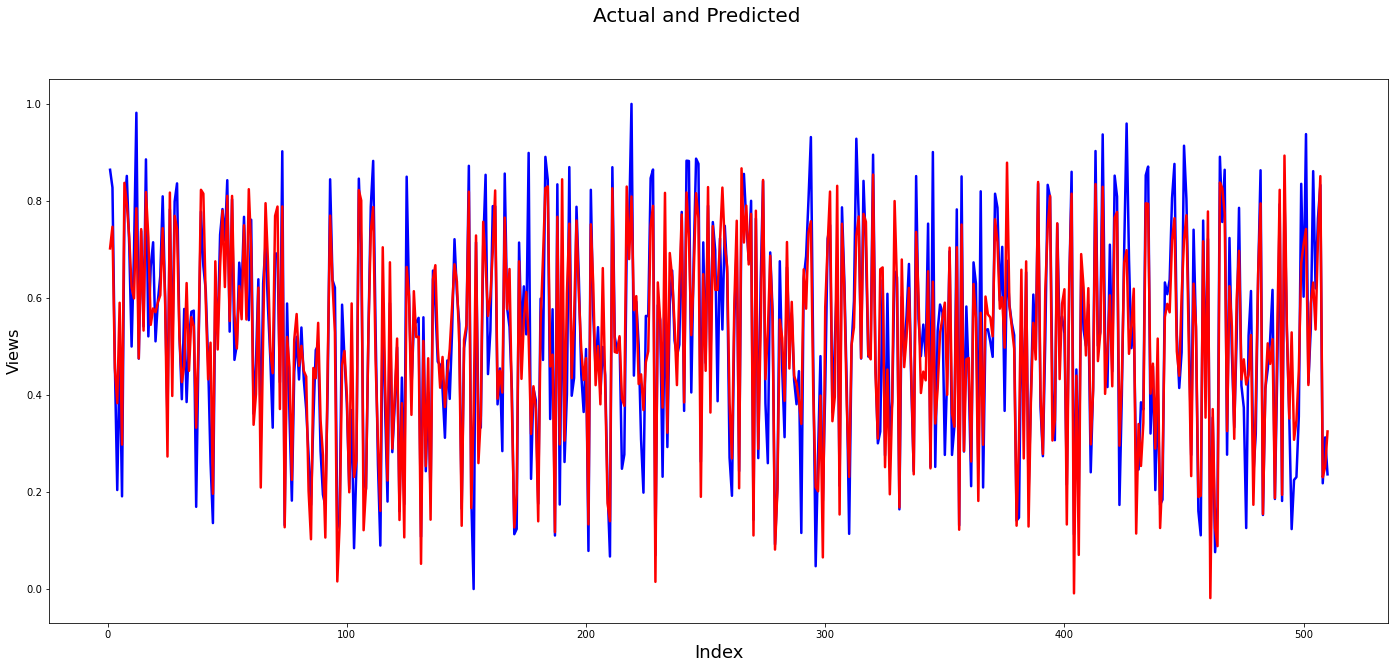

In [68]:
#Actual vs Predicted
c = [i for i in range(1,511,1)]
fig = plt.figure(figsize=(24,10))
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16) 

* The above figure shows that the predicted y train values decently cover the peaks and dips of the plotted y-actual values.

Text(0.5, 0, 'Errors')

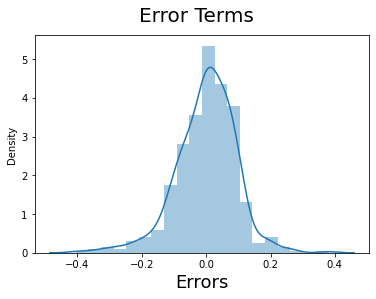

In [69]:
# Plot the histogram of the error terms to ensure that error terms are normally distributed.

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

* The above figure shows that Error terms are normally distributed.

Text(0.5, 1.0, 'Model1 Residuals Q-Q Plot')

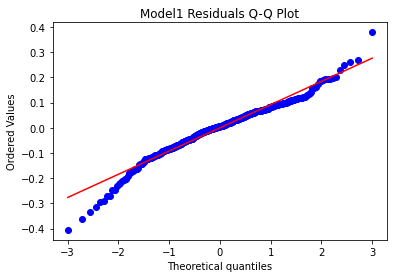

In [70]:
#Residual Q-Q plot
from scipy import stats

stats.probplot(lm_model9.resid, dist="norm", plot= plt)
plt.title("Model1 Residuals Q-Q Plot")


 * The above graph is a decent proof that the Residual error is normally distributed.

Text(0.5, 0, 'y_pred')

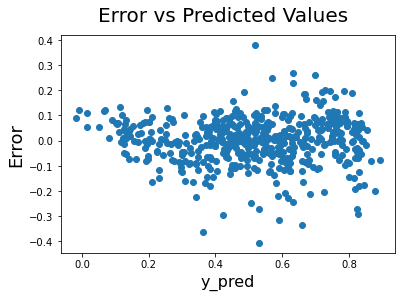

In [71]:
# plotting scatter plot of Error and Y-predicted

fig = plt.figure()
plt.scatter(y_train_pred,y_train - y_train_pred)
fig.suptitle('Error vs Predicted Values', fontsize = 20)              # Plot heading 
plt.ylabel('Error', fontsize = 18)                          # X-label
plt.xlabel('y_pred', fontsize = 16)    

* The above shows that Error terms are independent and has a pretty constant covariance.

In [72]:
print (y_train.shape)
print (y_train_pred.shape)

(510,)
(510,)


In [73]:
# Calculating R-Square and Mean Square Error:

mse_ = mean_squared_error(y_train, y_train_pred)
r_squared_ = r2_score(y_train, y_train_pred)

In [74]:
print('Mean_Squared_Error :' ,mse_)
print('r_square_value :',r_squared_)

Mean_Squared_Error : 0.008718879043518904
r_square_value : 0.82681023480748


## Step 7 : Making Predictions using the Final model

#### Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

Normalizing the test data values.

We dont do fit_transform from test data as we dont want to learn from the test data

In [75]:
# Applying scaling on the Test data.
vars=["atemp","hum","windspeed","cnt"]
df_test[vars]=scaler.transform(df_test[vars])

df_test.head()

,holiday,workingday,atemp,hum,windspeed,cnt,2019,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",1,2,3,4,5,6,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Spring,Summer,Winters
184,1,0,0.769660,0.657364,0.084219,0.692706,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
535,0,1,0.842587,0.610133,0.153728,0.712034,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
299,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
221,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,1,0.741471,0.314298,0.537414,0.569029,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


### Creating X and Y test data

In [76]:
# Dividing the data in to Y - containing target variable and Y - containg independent/explanatory variables

y_test = df_test.pop('cnt')
x_test = df_test

In [77]:
# creating new x_test variable with only essential columns

x_test_1=x_test[x_train_new_6.columns]

In [78]:
# # Adding constant variable to test dataframe

x_test_1=sm.add_constant(x_test_1)

In [79]:
# Making prediction using the latest model.

y_test_pred=lm_model9.predict(x_test_1)

Text(0, 0.5, 'Y Test Pred')

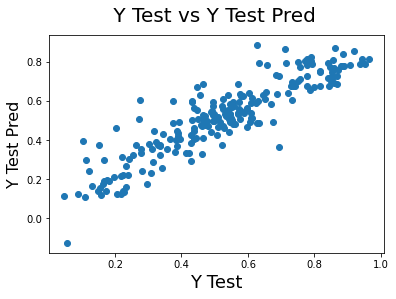

In [80]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle(' Y Test vs Y Test Pred', fontsize = 20)              # Plot heading 
plt.xlabel('Y Test', fontsize = 18)                         # X-label
plt.ylabel('Y Test Pred', fontsize = 16) 

Text(0, 0.5, 'Views')

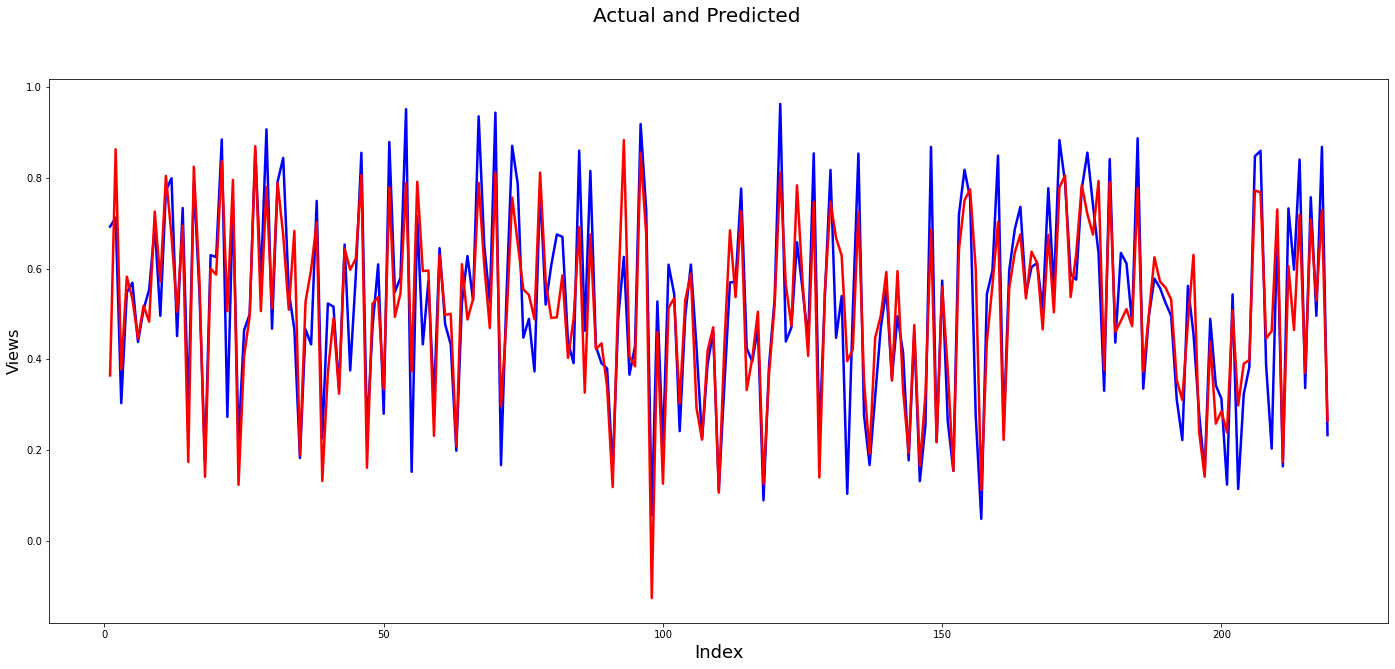

In [81]:
#Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(24,10))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16) 

* The above figure shows that the predicted y test values decently cover the peaks and dips of the plotted y-actual values.

Text(0.5, 0, 'Errors')

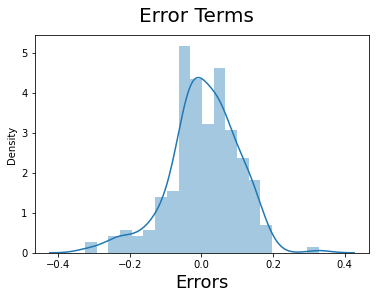

In [82]:
# Plot the histogram of the error terms to ensure error terms are normally distributed.

fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

* The above shows that Error terms are normally distributed (approx.)

Text(0.5, 0, 'y_pred')

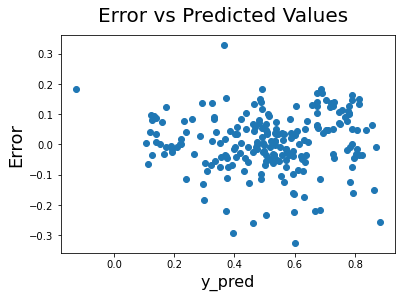

In [83]:
# plotting scatter plot of Y-predicted and y-actual values

fig = plt.figure()
plt.scatter(y_test_pred,y_test - y_test_pred)
fig.suptitle('Error vs Predicted Values', fontsize = 20)              # Plot heading 
plt.ylabel('Error', fontsize = 18)                          # X-label
plt.xlabel('y_pred', fontsize = 16)    

* The above shows that Error terms are independent and has a pretty constant covaraince.

In [84]:
print(y_test.shape)
print(y_test_pred.shape)

(219,)
(219,)


In [85]:
## Calculating R-Sqare and Mean Square Error:

mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)

In [86]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.009257943081117164
r_square_value : 0.8050787334363542


We can see that the equation of our best fitted line is:

$ cnt = 0.4125  \times  atemp + 0.2359  \times  "2019" + 0.0585 \times Sep - 0.2754 \times Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -0.0902 \times holiday - 0.1370 \times windspeed - 0.0824 \times Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist - 0.0698 \times Jul - 0.1453 \times Spring $